# Cargo librerias e instalo por 1era vez

In [27]:
# Instalando librerias por 1era vez
%pip install duckdb
%pip install jupysql
%pip install duckdb-engine
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install datetime
%pip install scikit-learn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\ybbar\onedrive\desktop\1era_competencia_prediccion_churn\.venv\lib\site-packages (1.7.2)




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# #Importando librerias al inicio de todo script.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import duckdb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.offline import plot  

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_slice, plot_contour
from time import time
import pickle

In [29]:
#Config DuckDB
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# %sql duckdb:///:default: # not working on vscode

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [30]:
#Para visualizar resultados de optuna
import optuna.visualization as vis

def plot_optimization_history(study, width=800, height=500):
    fig = vis.plot_optimization_history(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_param_importances(study, width=800, height=400):
    fig = vis.plot_param_importances(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_slice(study, width=1000, height=500):
    fig = vis.plot_slice(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_contour_all(study, width=1000, height=600):
    fig = vis.plot_contour(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_contour_custom(study, params=None, width=1000, height=600):
    if params is None:
        raise ValueError("Debes especificar los parámetros en 'params' (lista de strings).")
    fig = vis.plot_contour(study, params=params)
    fig.update_layout(width=width, height=height)
    fig.show()


# Paths y parametros globales

In [ ]:
#Paths y carga de datos
PATH_BASE =  'C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01'
PATH_DATA = "/".join([PATH_BASE, "data"])
PATH_DB_OPTUNA = "/".join([PATH_BASE, "optimization_optuna"])
PATH_KAGGLE = "/".join([PATH_BASE, "kaggle"])
PATH_MODELO =  "/".join([PATH_BASE, 'models'])
PATH_REPORTE = "/".join([PATH_BASE, 'reportes'])


# Crear carpetas si no existen
for path in [PATH_DATA, PATH_DB_OPTUNA, PATH_KAGGLE, PATH_MODELO, PATH_REPORTE]:
    os.makedirs(path, exist_ok=True)
    
FILENAME_CLASE_TERNARIA = 'competencia_01_clase_ternaria.csv'   # Sale del script 001_venv_ClaseTernaria.
PATH_FILENAME_TERNARIA = "/".join([PATH_DATA, FILENAME_CLASE_TERNARIA])

In [32]:
# Imprimir todas las rutas
print("📂 Directorios:")
print(f"PATH_BASE:         {PATH_BASE}")
print(f"PATH_DATA:         {PATH_DATA}")
print(f"PATH_DB_OPTUNA:    {PATH_DB_OPTUNA}")
print(f"PATH_KAGGLE:       {PATH_KAGGLE}")
print(f"PATH_MODELO:       {PATH_MODELO}")
print(f"PATH_REPORTE:      {PATH_REPORTE}")
print()
print("📄 Archivo de entrada:")
print(f"PATH_FILENAME_TERNARIA: {PATH_FILENAME_TERNARIA}")

📂 Directorios:
PATH_BASE:         C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01
PATH_DATA:         C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/data
PATH_DB_OPTUNA:    C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/optimization_optuna
PATH_KAGGLE:       C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/kaggle
PATH_MODELO:       C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/models
PATH_REPORTE:      C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/reportes

📄 Archivo de entrada:
PATH_FILENAME_TERNARIA: C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/data/competencia_01_clase_ternaria.csv


In [33]:
#Competencia y Experimento
from datetime import datetime
ahora = datetime.now().strftime("%Y%m%d_%H%M%S")
COMP = "Comp01"
EXP = "Exp014"

# Ganancia, costo estimulo y semillas
ganancia_acierto = 780000
costo_estimulo = 20000
semillas = [800003, 800021, 800051, 800093, 800123]

In [34]:
# Definición de Meses
mes_train = [202101, 202102]         # Meses de entrenamiento base
mes_val = 202103                     # Mes de validación (para Early Stopping)
mes_test = 202104                    # Mes de testeo (para métricas finales)
mes_full_train = [202103, 202104]    # [202101, 202102, 202103, 202104] # Meses de full train
mes_futuro = 202106                  # Mes para predicción final

In [35]:
#Para visualizar resultados de optuna
import optuna.visualization as vis

def plot_optimization_history(study, width=800, height=500):
    fig = vis.plot_optimization_history(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_param_importances(study, width=800, height=400):
    fig = vis.plot_param_importances(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_slice(study, width=1000, height=500):
    fig = vis.plot_slice(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_contour_all(study, width=1000, height=600):
    fig = vis.plot_contour(study)
    fig.update_layout(width=width, height=height)
    fig.show()

def plot_contour_custom(study, params=None, width=1000, height=600):
    if params is None:
        raise ValueError("Debes especificar los parámetros en 'params' (lista de strings).")
    fig = vis.plot_contour(study, params=params)
    fig.update_layout(width=width, height=height)
    fig.show()

# Carga datos con clase ternaria (sale de 001_venv_y_claseTernaria.ipynb).

In [36]:
# Cargar datos
data = pd.read_csv("/".join([PATH_DATA, FILENAME_CLASE_TERNARIA]), low_memory=False)

# EDA

## Reporte HTML

Genero reporte html y plotly de variables numericas y categoricas por mes del dataset.

In [37]:
# Obtener meses únicos ordenados
unique_months = sorted(data['foto_mes'].dropna().unique())
print(unique_months)

[np.int64(202101), np.int64(202102), np.int64(202103), np.int64(202104), np.int64(202105), np.int64(202106)]


### Analisis del EDA

Para leer .ods

In [39]:
%pip install odfpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Despues de evaluar a mano cada una de als variables crudas genere un dicc de datos con una leve descripcion. 

In [40]:
archivo = "/".join([PATH_REPORTE, "DiccionarioDatos_analisis EDA2025.ods"])
analisis_EDA_manual = pd.read_excel(archivo, engine="odf")  # motor para ODS

# Mostrar tabla con cantidad de ocurrencias por valor en la columna 'EDA promedios'
tabla_conteo = analisis_EDA_manual['EDA promedios'].value_counts().reset_index()
tabla_conteo.columns = ['EDA promedios', 'Cantidad de filas']

# Mostrar la tabla
print(tabla_conteo)

                                        EDA promedios  Cantidad de filas
0                                                 cte                 60
1                                    fluctuacion leve                 42
2                              fuertemente fluctuante                 16
3                          caida suave, repunta en 06                  4
4                    variable en funcion de los meses                  3
5           baja en mes 02, cte hasta 05 y sube en 06                  2
6   Sube en funcion del tiempo, esperable porque e...                  2
7                             cte sacando valle en 03                  2
8                                          pico en 04                  2
9       cte hasta mes 3, luego sube considerablemente                  2
10                                         pico en 03                  2
11                  cte hasta 03 despues decae fuerte                  2
12                                     sube en mes 

# Feature Engeneering

In [41]:
def crear_lags(df: pd.DataFrame, columnas: list[str], cant_lag: int = 1) -> pd.DataFrame:
    """
    Genera variables de lag para los atributos especificados utilizando SQL.
  
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame con los datos
    columnas : list
        Lista de atributos para los cuales generar lags. Si es None, no se generan lags.
    cant_lag : int, default=1
        Cantidad de lags a generar para cada atributo
  
    Returns:
    --------
    pd.DataFrame
        DataFrame con las variables de lag agregadas
    """

    # Construir la consulta SQL
    sql = "SELECT *"

    # Agregar los lags para los atributos especificados
    for attr in columnas:
        if attr in df.columns:
            for i in range(1, cant_lag + 1):
                sql += f", lag({attr}, {i}) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) AS {attr}_lag_{i}"
        else:
            #logger.warning(f"El atributo {attr} no existe en el DataFrame") 
            print("El atributo no existe en el DF")


    # Completar la consulta
    sql += " FROM df"


    # Ejecutar la consulta SQL
    con = duckdb.connect(database=":memory:")
    con.register("df", df)
    df = con.execute(sql).df() # Asigno la consulta al df.
    con.close()

    return df


def crear_deltas(df: pd.DataFrame, columnas: list[str], cant_deltas: int = 1) -> pd.DataFrame:
    """
    Genera variables de delta (diferencia con meses anteriores) para los atributos especificados utilizando SQL.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame con los datos
    columnas : list[str]
        Lista de atributos para los cuales generar deltas. Si es None o vacía, no se generan.
    cant_deltas : int, default=1
        Cantidad de deltas (meses hacia atrás) a calcular para cada atributo

    Returns:
    --------
    pd.DataFrame
        DataFrame con las variables de delta agregadas
    """


    # Construir la consulta SQL
    sql = "SELECT *"

    # Agregar los deltas para los atributos especificados
    for attr in columnas:
        if attr in df.columns:
            for i in range(1, cant_deltas + 1):
                sql += f", {attr} - lag({attr}, {i}) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) AS {attr}_delta_{i}"
        else:
            #logger.warning(f"El atributo {attr} no existe en el DataFrame") 
            print("El atributo no existe en el DF")

    # Completar la consulta
    sql += " FROM df"

    # Ejecutar la consulta SQL
    con = duckdb.connect(database=":memory:")
    con.register("df", df)
    df = con.execute(sql).df()
    con.close()
    return df

In [42]:

print("Antes del FE  tengo", data.shape[1], "columnas")
#Numericas, sin categoricas y sin estas
# excluir = ['clase_ternaria', 'clase_peso', 'clase_binaria2', 'numero_de_cliente', 'foto_mes']
# FE_atributos = data.select_dtypes(include=['number']).drop(columns=excluir, errors='ignore').columns.tolist()
FE_atributos = ['cpayroll_trx', 'Visa_msaldototal', 'mautoservicio', 'mpasivos_margen', 'ctrx_quarter', 'mcomisiones', 'ccomisiones_mantenimiento', 
                'mautoservicio', 'mcaja_ahorro', 'mpayroll', 'mcuenta_corriente', 'mrentabilidad_annual', 'Visa_Fvencimiento', "Master_Fvencimiento", "mcuenta_corriente",
                "mactivos_margen", "mrentabilidad"]


#   Feature engineering | Lags
atributos_lags = FE_atributos #Atributos para los cuales quiero crear lags
cant_lags = 2 #Cantidad de lags a crear (1 mes atras, 2 meses atras, etc)
data = crear_lags(data, atributos_lags, cant_lags)

#    Feature engineering | Deltas
atributos_deltas = FE_atributos 
cant_deltas = 2
data = crear_deltas(data, atributos_deltas, cant_deltas)

print("Tengo", len(FE_atributos) * cant_lags * cant_deltas, " atributos nuevos [Por cada lag y delta se suma esta cantidad de columnas]")
print("Despues del FE tengo", data.shape[1], "columnas")


Antes del FE  tengo 155 columnas
Tengo 68  atributos nuevos [Por cada lag y delta se suma esta cantidad de columnas]
Despues del FE tengo 223 columnas


# Canaritos (no explorado)

# Data Drifting  (no explorado)

# Data quality (no explorado)

# Preprocessing

### Binarizacion de la target

In [43]:
# Preparar variables
# Esto permite luego diferenciar las clases dentro de una única clase positiva (BAJA+1 y BAJA+2 combinadas).
data['clase_peso'] = 1.0
data.loc[data['clase_ternaria'] == 'BAJA+2', 'clase_peso'] = 1.00002
data.loc[data['clase_ternaria'] == 'BAJA+1', 'clase_peso'] = 1.00001

data['clase_binaria2'] = 0
data['clase_binaria2'] = np.where(data['clase_ternaria'] == 'CONTINUA', 0, 1) # la binaria2 incluye a los BAJA+1


# Separo en train, validacion y test

### Separo en 3 datasets: Train, test y validacion

In [46]:
excluir = ['clase_ternaria', 'clase_peso', 'clase_binaria1', 'clase_binaria2']
X_columns = [col for col in data.columns if col not in excluir]
y_column = ['clase_binaria2']

ID_COLUMN = 'numero_de_cliente'
TIME_COLUMN = 'foto_mes'
WEIGHT_COLUMN = 'clase_peso'

In [47]:
# 1. Conjunto de Entrenamiento (202101, 202102)
df_train = data[data[TIME_COLUMN].isin(mes_train)]
X_train = df_train[X_columns]
y_train = df_train[y_column]
w_train = df_train[WEIGHT_COLUMN] # ⬅️ Nuevo: Pesos de entrenamiento

# 2. Conjunto de Validación (202103)
df_val = data[data[TIME_COLUMN] == mes_val]
X_val = df_val[X_columns]
y_val = df_val[y_column]
w_val = df_val[WEIGHT_COLUMN] # ⬅️ Nuevo: Pesos de validación

# 3. Conjunto de Testeo (202104)
df_test = data[data[TIME_COLUMN] == mes_test]
X_test = df_test[X_columns]
y_test = df_test[y_column]
w_test = df_test[WEIGHT_COLUMN] # ⬅️ Nuevo: Pesos de testeo

# --- Codificación del Target (Necesaria si no lo has hecho) ---
# Si 'clase_binaria2' ya es 0 y 1, no necesitas LabelEncoder.
# Solo renombramos para coherencia con LGBM.
y_train_encoded = y_train.values # Ya debe ser 0/1
y_val_encoded = y_val.values     # Ya debe ser 0/1
y_test_encoded = y_test.values   # Ya debe ser 0/1

print("\n--- División con Pesos ---")
print(f"Train (202101-02): {len(X_train)} filas")
print(f"Validación (202103): {len(X_val)} filas")
print(f"Test (202104): {len(X_test)} filas")


--- División con Pesos ---
Train (202101-02): 323682 filas
Validación (202103): 163109 filas
Test (202104): 163418 filas


# LGBM + optimizacion de h.p. (Train + Val)

### LGBM

In [49]:
# LightGBM Dataset
#dtrain = lgb.Dataset(X_train_imp, label=y_train, weight=w_train)
dtrain = lgb.Dataset(X_train, label=y_train, weight=w_train) #LGBM necesita su propio tipo de Dataset.

# Función de evaluación de ganancia
#Esta funcion es custom, nuestra, no usamos métricas típicas como accuracy, logloss o AUC.
def lgb_gan_eval(y_pred, data):
    #Objetivo: Se llama en cada iteración del cross-validation (lgb.cv) para calcular la ganancia 
    # máxima posible si ordenás a los clientes según la probabilidad de respuesta del modelo
    # y luego decidís hasta dónde enviar estímulos (como si tuvieras un presupuesto variable).
    
    #Este enfoque no necesita definir un punto de corte fijo (como 0.025).
    #Se enfoca en buscar el mejor número de clientes a estimular para maximizar la ganancia en validación.
    
    weight = data.get_weight() # Recupera los pesos 
    ganancia = np.where(weight == 1.00002, ganancia_acierto, 0) - np.where(weight < 1.00002, costo_estimulo, 0) # Crea un array de ganancia
    ganancia = ganancia[np.argsort(y_pred)[::-1]] #Ordena los valores de ganancia según la probabilidad predicha (y_pred) en orden descendente.
    ganancia = np.cumsum(ganancia) #Calcula la ganancia acumulada en ese orden y Permite evaluar cuál es el mejor corte (cantidad de clientes) que da la máxima ganancia total.
    
    return 'gan_eval', np.max(ganancia), True


### Study de optuna

In [51]:
# Optuna con CV
def objective(trial):
    #Es la función objetivo que Optuna va a llamar en cada "trial" (intento), proponiendo un nuevo conjunto de hiperparámetros.
    param = {
        'objective': 'binary', # X diseño de lo q quiero predecir
        'metric': 'custom', #pq usamos la nuestra propia
        'boosting_type': 'gbdt', #GBDT = Gradient Boosting Decission Trees, aca podria poner RF; desrecomendado usar 'dart'"Competencia01_Exp002_LGBM_train hasta abril.ipynb"
        'max_bin': 31, #o 63 o 127
        'num_leaves': trial.suggest_int('num_leaves', 8, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3), #a mas bajo, mayor número de iteraciones es necesario
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 1000),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'seed': semillas[0],
        'verbose': -1,
        #'min_parallel_tree': trial.suggest_int('min_parallel_tree', 1, 5), #A veces mejora la velocidad de entrenamiento y/o permite un poco de aleatoriedad extra. [si se usa GPU]
        #'extra_tree': trial.suggest_categorical('extra_tree', [True, False]), #Tira valores al azar para hacer cortes. Segun alejandro funciona muy bien
        'feature_pre_filter': False
    }

    #Aquí se entrena y valida el modelo con 5-fold cross-validation, usando los hiperparámetros definidos arriba.
    cv_result = lgb.cv(
        param,
        dtrain,
        num_boost_round = 300,      # Modificar, subit y subir... y descomentar la línea inferior
        #early_stopping_rounds= int(50+5 / (param['learning_rate']))  ,   # Corta el entrenamiento si el modelo deja de mejorar durante N rondas consecutivas.
        feval=lgb_gan_eval,
        stratified=True,
        nfold=5,
        seed=semillas[0],
        callbacks=[
                lgb.early_stopping(stopping_rounds=int(50+5 / (param['learning_rate'])), verbose=False),
                #lgb.log_evaluation(period=200),
        ]
    )

    max_ganancia = max(cv_result['valid gan_eval-mean']) # Toma la máxima ganancia promedio alcanzada entre los 5 folds.
    best_iter = cv_result['valid gan_eval-mean'].index(max_ganancia) + 1 # Encuentra en qué iteración se logró esa ganancia máxima.
    trial.set_user_attr("best_iter", best_iter) #Guarda ese dato dentro del trial, así lo podés recuperar después.
    
    return max_ganancia * 5  #Como la ganancia es promedio entre los 5 folds, se multiplica por 5 para simular la ganancia total estimada en datos reales (sin dividirlos en folds).





# Crear estudio Optuna
storage_name = "sqlite:///" + PATH_DB_OPTUNA +"/"+ f"{COMP}_{EXP}_optimization_lgbm.db"
study_name = f"{COMP}_{EXP}_lgbm"


study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    #sampler = optuna.samplers.TPESampler(n_startup_trials=10), # Crear sampler bayesiano con N iteraciones exploratorias
    load_if_exists=True,    
    )

# Printeo donde se va a guardar el study.
print(f"📍 El estudio de Optuna se guardará en: {storage_name}")

[I 2025-10-07 09:44:42,101] A new study created in RDB with name: Comp01_Exp014_lgbm


📍 El estudio de Optuna se guardará en: sqlite:///C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/optimization_optuna/Comp01_Exp014_optimization_lgbm.db


### Corro el study de optuna

In [52]:
study.optimize(objective, n_trials = 100)

[I 2025-10-07 09:45:34,444] Trial 0 finished with value: 546020000.0 and parameters: {'num_leaves': 87, 'learning_rate': 0.28920473813080777, 'min_data_in_leaf': 572, 'feature_fraction': 0.4813086662799426, 'bagging_fraction': 0.30449163180523764}. Best is trial 0 with value: 546020000.0.
[I 2025-10-07 09:46:14,232] Trial 1 finished with value: 549500000.0 and parameters: {'num_leaves': 67, 'learning_rate': 0.19658193729901347, 'min_data_in_leaf': 544, 'feature_fraction': 0.3769014955726506, 'bagging_fraction': 0.33941032304462826}. Best is trial 1 with value: 549500000.0.
[I 2025-10-07 09:46:46,265] Trial 2 finished with value: 570120000.0 and parameters: {'num_leaves': 79, 'learning_rate': 0.14974920850876, 'min_data_in_leaf': 588, 'feature_fraction': 0.8485992914323963, 'bagging_fraction': 0.9832714208083206}. Best is trial 2 with value: 570120000.0.
[I 2025-10-07 09:47:05,687] Trial 3 finished with value: 546360000.0 and parameters: {'num_leaves': 63, 'learning_rate': 0.19586080870

### Veo que salio de optuna

In [53]:
plot_optimization_history(study)

In [54]:
plot_param_importances(study)

In [ ]:
# plot_slice(study)

In [ ]:
# plot_contour(study) # plot_contour_all(study)

In [55]:
plot_contour_custom(study,params=['num_leaves','min_data_in_leaf'] )

### Mejor modelo con los mejores h.p.

Entrenamiento final del mejor modelo (LightGBM) con los mejores h.p. de optuna, entrenado con TRAIN y prediciendo sobre VAL.



Mejor cantidad de árboles para el mejor modelo: 294

 ===> Ganancia LGBM en VALIDACIÓN (202103): $ 949700000.0


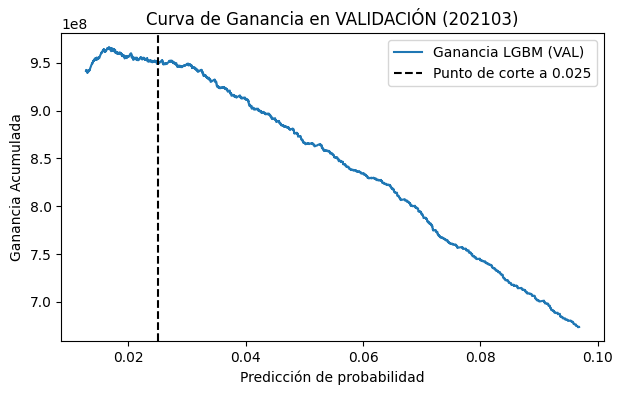

In [56]:
# --- 1. Definición de Parámetros Óptimos de optuna---
best_iter = study.best_trial.user_attrs["best_iter"]
print(f"Mejor cantidad de árboles para el mejor modelo: {best_iter}")

# Creamos el diccionario de parámetros con los resultados de Optuna
params = {
    'objective': 'binary',
    'metric': 'custom', # Usamos la métrica de ganancia personalizada
    'boosting_type': 'gbdt',
    'max_bin': 31,
    'num_leaves': study.best_trial.params['num_leaves'],
    'learning_rate': study.best_trial.params['learning_rate'],
    'min_data_in_leaf': study.best_trial.params['min_data_in_leaf'],
    'feature_fraction': study.best_trial.params['feature_fraction'],
    'bagging_fraction': study.best_trial.params['bagging_fraction'],
    # 'extra_tree': study.best_trial.params['extra_tree'], # Descomentar si usaste extra_tree
    'seed': semillas[0],
    'feature_pre_filter': False,
    'verbose': -1,
}

# --- 2. Entrenamiento en TRAIN y Predicción en VAL  ---

# Crear el Dataset de entrenamiento 
train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)

# Entrenar el modelo
model_val = lgb.train(
    params, # <-- Parámetros de Optuna
    train_data, # <-- Set TRAIN (202101, 202102)
    num_boost_round=best_iter # <-- Mejor cantidad de árboles
)

# Predecir sobre el set de VALIDACIÓN 
y_pred_val = model_val.predict(X_val)


# --- 3. Cálculo de Ganancia y Curva de Ganancia en VALIDACIÓN  ---

# Reutilizamos tu función de ganancia (asumiendo que y_val es el target sin codificar, ej. 'BAJA+2' o 1)
# NOTA: Usamos y_val.values para asegurar que sea un array de NumPy
y_val_arr = y_val.values

def ganancia_prob(y_pred, y_true, prop = 1):
  """Calcula la ganancia total para el punto de corte (ej. 0.025)"""
  ganancia = np.where(y_true == 1, ganancia_acierto, 0) - np.where(y_true == 0, costo_estimulo, 0)
  return ganancia[y_pred >= 0.025].sum() / prop # Usamos el punto de corte definido por tu Optuna

# Ganancia total en VALIDACIÓN (202103)
print("\n ===> Ganancia LGBM en VALIDACIÓN (202103): $", ganancia_prob(y_pred_val, y_val_arr))

# Curva de Ganancia (Gráfico)
ganancia_val = np.where(y_val_arr == 1, ganancia_acierto, 0) - np.where(y_val_arr == 0, costo_estimulo, 0)
idx_val = np.argsort(y_pred_val)[::-1]
ganancia_val_cum = np.cumsum(ganancia_val[idx_val])
y_pred_val_sorted = y_pred_val[idx_val]

piso_envios = 4000
techo_envios = 20000

plt.figure(figsize=(7, 4))
plt.plot(y_pred_val_sorted[piso_envios:techo_envios], ganancia_val_cum[piso_envios:techo_envios], label='Ganancia LGBM (VAL)')
plt.title('Curva de Ganancia en VALIDACIÓN (202103)')
plt.xlabel('Predicción de probabilidad')
plt.ylabel('Ganancia Acumulada')
plt.axvline(x=0.025, color='black', linestyle='--', label='Punto de corte a 0.025')
plt.legend()
plt.show()

# Guardar el modelo (opcional, si quieres el modelo solo entrenado en TRAIN)
model_val.save_model(PATH_MODELO + f'{COMP}_{EXP}_modelo_TRAIN_VAL.txt')

### Guardo el modelo ajustado

Para guardar el modelo para poder utilizarlo más adelante, no es necesario guardarlo como pickle, la librería nos permite guardarlo en formato texto

In [57]:
model_val.save_model(PATH_MODELO + "/" + f'{COMP}_{EXP}_modelo validacion LGBM.txt')

Y recuperar el mismo desde ese formato



In [58]:
model_val = lgb.Booster(model_file=PATH_MODELO +"/" +  f'{COMP}_{EXP}_modelo validacion LGBM.txt')

# Entrenamiento con TRAIN + VAL y testeo en TEST

* Con los mejores h.p. de optuna voy a entrenar con TRAIN+VAL, y predecir en TEST.
* Con esto tambien saco conclusiones de la performance de mi modelo
* En Resumen de todo el proceso: 

    * Hacer train (01 y 02) y validación (03) y optimizamos hiperparam con la bayesiana
    * Vovlemos a entrenar con esos h.p. y testeamos con mes 04
    * Finalmente re entrenamos con esos mismos hp y predecimos el mes 06 para mandar a kaggle.


--- ENTRENAMIENTO: TRAIN + VAL (486791 filas) ---
 ===> Ganancia LGBM en TEST (202104): $ 1019500000.0


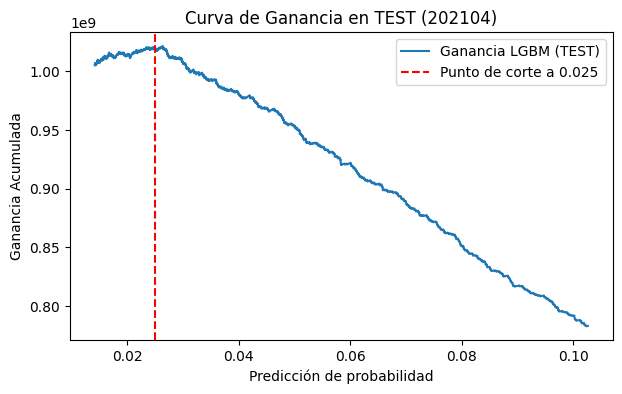

In [59]:
# --- 1. Definición del Conjunto TRAIN + VAL (202101, 202102, 202103) ---

# Unir X_train con X_val y X_test con X_val, y sus pesos/targets
X_train_val = pd.concat([X_train, X_val], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)
w_train_val = pd.concat([w_train, w_val], ignore_index=True)

print(f"\n--- ENTRENAMIENTO: TRAIN + VAL ({len(X_train_val)} filas) ---")

# 2. Crear el Dataset de entrenamiento (TRAIN + VAL)
train_val_data = lgb.Dataset(X_train_val, label=y_train_val, weight=w_train_val)

# 3. Entrenar el modelo (TRAIN + VAL)
model_test = lgb.train(
    params, # <-- Parámetros de Optuna
    train_val_data, # <-- Set TRAIN + VAL
    num_boost_round=best_iter # <-- Mejor cantidad de árboles
)

# 4. Predicción sobre el set de TEST (202104)
y_pred_test = model_test.predict(X_test)


# --- 5. Cálculo de Ganancia y Curva de Ganancia en TEST (202104) ---

# Ganancia total en TEST (202104)
y_test_arr = y_test.values
print(" ===> Ganancia LGBM en TEST (202104): $", ganancia_prob(y_pred_test, y_test_arr))

# Curva de Ganancia (Gráfico)
ganancia_test = np.where(y_test_arr == 1, ganancia_acierto, 0) - np.where(y_test_arr == 0, costo_estimulo, 0)
idx_test = np.argsort(y_pred_test)[::-1]
ganancia_test_cum = np.cumsum(ganancia_test[idx_test])
y_pred_test_sorted = y_pred_test[idx_test]

plt.figure(figsize=(7, 4))
plt.plot(y_pred_test_sorted[piso_envios:techo_envios], ganancia_test_cum[piso_envios:techo_envios], label='Ganancia LGBM (TEST)')
plt.title('Curva de Ganancia en TEST (202104)')
plt.xlabel('Predicción de probabilidad')
plt.ylabel('Ganancia Acumulada')
plt.axvline(x=0.025, color='red', linestyle='--', label='Punto de corte a 0.025')
plt.legend()
plt.show()

### Feature importance del modelo LGBM entrenado con TRAIN+VAL y prediciendo en TEST

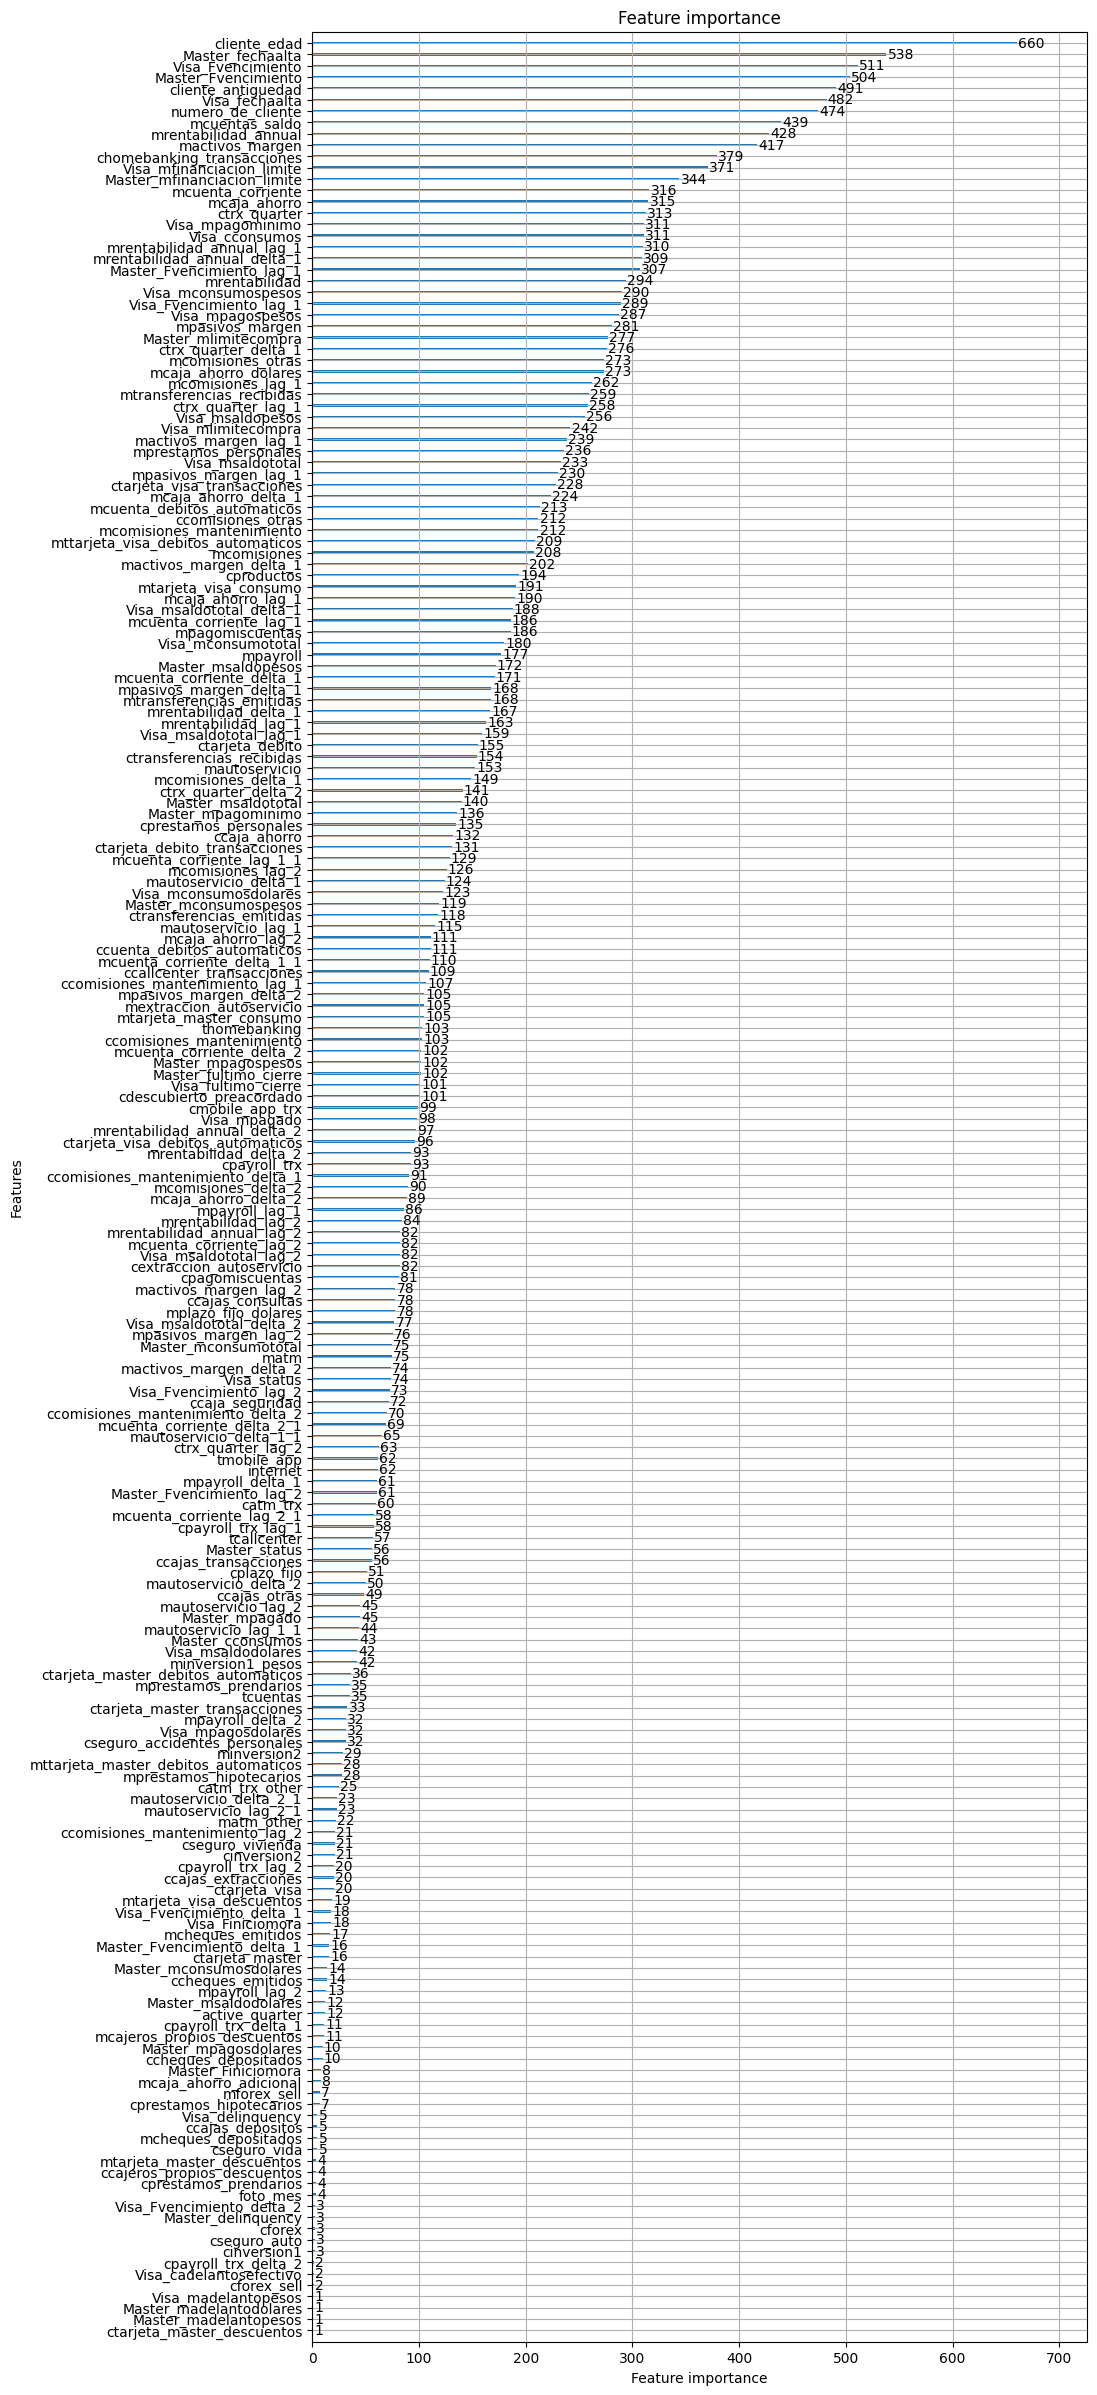

In [60]:
lgb.plot_importance(model_test, figsize=(10, 30)) #Observamos la variables más importantes para el modelo:
plt.show()


### Idem pero formato tabla

In [61]:
importances = model_test.feature_importance()
feature_names = X_train.columns.tolist()
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)
importance_df[importance_df['importance'] > 0]

feature  importance
5                  cliente_edad         660
127            Master_fechaalta         538
135           Visa_Fvencimiento         511
113         Master_Fvencimiento         504
6            cliente_antiguedad         491
..                          ...         ...
152     Visa_cadelantosefectivo           2
69   ctarjeta_master_descuentos           1
121       Master_madelantopesos           1
122     Master_madelantodolares           1
143         Visa_madelantopesos           1

[203 rows x 2 columns]

### Predicciones con el modelo en X_test

In [62]:
# predecimos sobre test.
y_pred_lgm = model_test.predict(X_test) 

### Calculo de gnanacia en terminos de proba


In [63]:
def ganancia_prob(y_pred, y_true, prop = 1):
  ganancia = np.where(y_true == 1, ganancia_acierto, 0) - np.where(y_true == 0, costo_estimulo, 0)
  return ganancia[y_pred >= 0.025].sum() / prop

print(" ===>   Ganancia LGBM (en $):  ", ganancia_prob(y_pred_lgm, y_test))

 ===>   Ganancia LGBM (en $):   1019500000.0


# Curvas de gananacia

In [64]:
# 1. Ganancia por cliente
ganancia = np.where(y_test == 1, ganancia_acierto, 0) - np.where(y_test == 0, costo_estimulo, 0)

# 2. Ordenar predicciones de mayor a menor
idx = np.argsort(y_pred_lgm)[::-1]

# 3. Reordenar ganancia y predicciones en ese orden
ganancia = ganancia[idx]
y_pred_lgm = y_pred_lgm[idx]

# 4. Ganancia acumulada
ganancia_cum = np.cumsum(ganancia)

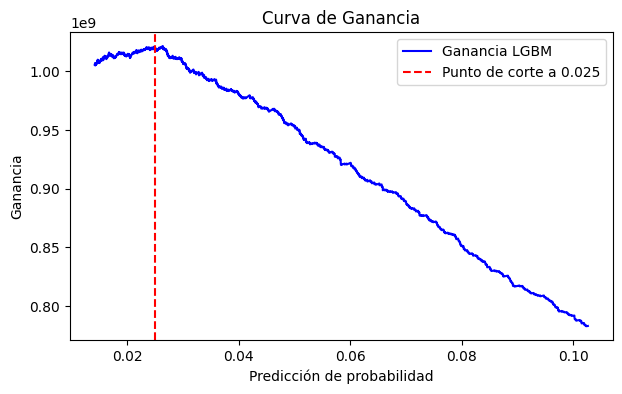

In [ ]:
piso_envios = 4000 #Nro clientes min a estimmular
techo_envios = 25000#Nro clientes max a estimmular

plt.figure(figsize=(7, 4))
plt.plot(y_pred_lgm[piso_envios:techo_envios], ganancia_cum[piso_envios:techo_envios], label='Ganancia LGBM', color='blue')
plt.title('Curva de Ganancia')
plt.xlabel('Predicción de probabilidad')
plt.ylabel('Ganancia')
plt.axvline(x=0.025, color='red', linestyle='--', label='Punto de corte a 0.025')
plt.legend()
plt.show()


Ganancia máxima: 1021300000
Cantidad de envíos óptima: 13374


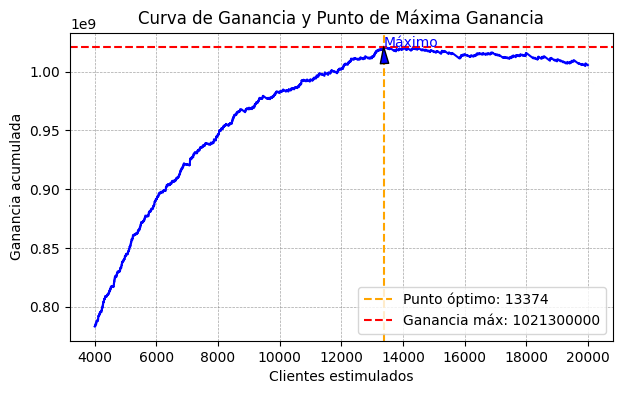

In [ ]:
ganancia_max = ganancia_cum.max()
gan_max_idx = np.argmax(ganancia_cum)

print(f"Ganancia máxima en TEST: {ganancia_max}")
print(f"Cantidad de envíos óptima: {gan_max_idx}")

# Opcional: graficar con líneas
plt.figure(figsize=(7, 4))
plt.plot(range(piso_envios, techo_envios), ganancia_cum[piso_envios:techo_envios], color='blue')
plt.axvline(x=gan_max_idx, color='orange', linestyle='--', label=f'Punto óptimo: {gan_max_idx}')
plt.axhline(y=ganancia_max, color='red', linestyle='--', label=f'Ganancia máx: {ganancia_max}')
# # Agregar la flecha en el punto de intersección
# plt.annotate(
#     'Máximo',
#     xy=(gan_max_idx, ganancia_max),             # Punto al que apunta
#     xytext=(gan_max_idx + 5, ganancia_max + 5), # Posición del texto
#     arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=6),
#     fontsize=10,color='blue')
plt.title('Curva de Ganancia y Punto de Máxima Ganancia')
plt.xlabel('Clientes estimulados')
plt.ylabel('Ganancia acumulada')
plt.legend()
plt.grid(True,linestyle='--',linewidth=0.5,color='gray', alpha=0.7 )       
plt.show()


# Kaggle

In [67]:
# --- 1. Definición del Conjunto FULL TRAIN (202101 a 202104) ---

# Unir TRAIN+VAL con TEST
X_full = pd.concat([X_train_val, X_test], ignore_index=True)
y_full = pd.concat([y_train_val, y_test], ignore_index=True)
w_full = pd.concat([w_train_val, w_test], ignore_index=True)

print(f"\n--- ENTRENAMIENTO FINAL: FULL TRAIN ({len(X_full)} filas) ---")

# 2. Crear el Dataset de entrenamiento FULL
full_data = lgb.Dataset(X_full, label=y_full, weight=w_full)

# 3. Entrenar el Modelo FINAL
model_final = lgb.train(
    params, # <-- Parámetros de Optuna
    full_data, # <-- Set FULL
    num_boost_round=best_iter # <-- Mejor cantidad de árboles
)

# 4. Guardar el modelo FINAL
model_final.save_model(PATH_MODELO + f'{COMP}_{EXP}_modelo_FINAL.txt')

# --- 5. Predicción en 202106 ---

# ⚠️ Aseguramos que solo tomamos los datos de 202106
data_futuro = data.copy() # Si el mes 202106 ya está en tu 'data' principal
X_futuro = data_futuro[data_futuro[TIME_COLUMN] == mes_futuro].copy() 
X_futuro_features = X_futuro[X_columns] # Solo las features

# Predicción
y_pred_futuro = model_final.predict(X_futuro_features)

# --- 6. Armar CSV para Kaggle ---
df_kaggle = pd.DataFrame({
    ID_COLUMN: X_futuro[ID_COLUMN].values, # Usamos ID_COLUMN definido
    'probability': y_pred_futuro
})

# Lógica de Top N
#n_clientes_mayor_proba = 12000 #DEPRECATED
n_clientes_optimos = gan_max_idx
df_kaggle = df_kaggle.sort_values(by='probability', ascending=False)
df_kaggle['Predicted'] = 0
df_kaggle.iloc[:n_clientes_optimos, df_kaggle.columns.get_loc('Predicted')] = 1

# Guardar CSV
kaggle_file = PATH_KAGGLE + f'/{COMP}_{EXP}_n envios {n_clientes_optimos}.csv'
K_submission = df_kaggle[[ID_COLUMN, 'Predicted']]
K_submission.to_csv(kaggle_file, index=False)
print(f"✅ Archivo de envío guardado en: {kaggle_file}")


--- ENTRENAMIENTO FINAL: FULL TRAIN (650209 filas) ---
✅ Archivo de envío guardado en: C:/Users/ybbar/OneDrive/Desktop/DMEyF2025_Competencia01/kaggle/Comp01_Exp014_n envios 13374.csv
